# Python Preparation

In [2]:
import pandas as pd
import seaborn as sns
from skimpy import skim
from summarytools import dfSummary

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Data Preparation

This section we will fetch the csv as follow:

Statistic
T
Unit
Value
X_1, ..., X_n Random Variables

This Section contains a function for each 

In [1]:
# Data Preparation

# Tourism in Ireland

# Source 1
# https://www.cso.ie/en/statistics/tourismandtravel/
## Tourism and Travel
### Household Travel Survey
#### Household Travel Survey Quarter 3 2023

# Dataset
## Name HTQ01: Travel by Irish Residents - Reason for Journey
## Filename: ./datasets/HTQ01.20240316T180315_TravelByIrishResidents_ReasonForJourney.csv
## Varname: tma09_df_C1


# Dataset
## Name: Overseas Trips to and from Ireland.Route of Travel
## Source: https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TMA07/CSV/1.0/en
## Varname: tma07_df

# Name HTQ17: Domestic Travel by Irish Residents - Reason for Journey, Region Visited
## Filename: ./datasets/HTQ17.20240317T090350_DomesticTravelByIrishResidents_ReasonDestination.csv


# Helper Functions

In [154]:
# This function will be used inside a Data Preparatory Function to build
# a Pandas Dataframe from a Central Statistics Office Statistic Code
def cso_df(cso_stat_code):
    return pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/"+ cso_stat_code +"/CSV/1.0/en")

# Note: this function could have been named cso_df_from_code
# The name has been reduced as this Jupyter is only using
# Central Statistics Office Public API to fetch the data

# Data Preparatory Functions

This section contains functions which fetch and manipulate a csv into a Pandas Dataframe. 
Using a function incapsulate all the steps required to transform the source into a table or a graph. Every function is independent from all the others.

In [166]:
# NAME CONVENTION csoStatCode_bla bla bla

def htq01():
    return cso_df("htq01")

def htq17():
    return cso_df("htq17")

def tma09():
    return cso_df("tma09")

def tma09_value():
    df = cso_df("tma09")  
    
    #df = df.loc[:,"VALUE"]
    df = df["VALUE"]
    
    return df
    


# Exploratory Data Analysis

This part of the Jupyter Notebook will be used as a Terminal to quickly visualize tables in tabular or graphical mode.


In [167]:
htq01().head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02276V02746,Domestic,C02599V03153,Reason for Journey,UNIT,VALUE
0,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,-,All reasons for journey,Thousand,1169.0
1,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,01,Holiday,Thousand,408.0
2,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,02,Business,Thousand,161.0
3,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,03,Visiting friends/relatives,Thousand,468.0
4,HTQ01C1,Number of Trips by Irish Residents,2000Q1,2000Q1,1,Domestic,08,Other reasons,Thousand,132.0


In [168]:
htq01().shape

(3480, 10)

In [169]:
htq01().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STATISTIC           3480 non-null   object 
 1   Statistic Label     3480 non-null   object 
 2   TLIST(Q1)           3480 non-null   object 
 3   Quarter             3480 non-null   object 
 4   C02276V02746        3480 non-null   int64  
 5   Domestic            3480 non-null   object 
 6   C02599V03153        3480 non-null   object 
 7   Reason for Journey  3480 non-null   object 
 8   UNIT                3480 non-null   object 
 9   VALUE               3416 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 272.0+ KB


In [170]:
htq17().head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02599V03153,Reason for Journey,C02196V04140,Region Visited,UNIT,VALUE
0,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,-,State,Thousand,2118.0
1,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE04,Northern and Western,Thousand,431.0
2,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE041,Border,Thousand,NaN
3,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE042,West,Thousand,NaN
4,HTQ17C01,Number of Trips by Irish Residents,20181,2018Q1,-,All reasons for journey,IE05,Southern,Thousand,1038.0


In [171]:
htq17().shape

(4140, 10)

In [172]:
htq17().describe(include='all')

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02599V03153,Reason for Journey,C02196V04140,Region Visited,UNIT,VALUE
count,4140,4140,4140.000000,4140,4140,4140,4140,4140,4140,1317.000000
unique,3,3,NaN,23,5,5,12,12,2,NaN
top,HTQ17C01,Number of Trips by Irish Residents,NaN,2018Q1,-,All reasons for journey,-,State,Thousand,NaN
freq,1380,1380,NaN,180,828,828,345,345,2760,NaN
mean,NaN,NaN,20206.347826,NaN,NaN,NaN,NaN,NaN,NaN,667.365148
std,NaN,NaN,16.548662,NaN,NaN,NaN,NaN,NaN,NaN,1476.741229
min,NaN,NaN,20181.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.100000
25%,NaN,NaN,20192.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.900000
50%,NaN,NaN,20204.000000,NaN,NaN,NaN,NaN,NaN,NaN,126.000000
75%,NaN,NaN,20222.000000,NaN,NaN,NaN,NaN,NaN,NaN,673.000000


In [173]:
htq17()["Reason for Journey"].value_counts()

Reason for Journey
All reasons for journey       828
Holiday                       828
Business                      828
Visiting friends/relatives    828
Other reasons                 828
Name: count, dtype: int64

In [174]:
htq17()["Quarter"].value_counts()

Quarter
2018Q1    180
2021Q1    180
2023Q2    180
2023Q1    180
2022Q4    180
2022Q3    180
2022Q2    180
2022Q1    180
2021Q4    180
2021Q3    180
2021Q2    180
2020Q4    180
2018Q2    180
2020Q3    180
2020Q2    180
2020Q1    180
2019Q4    180
2019Q3    180
2019Q2    180
2019Q1    180
2018Q4    180
2018Q3    180
2023Q3    180
Name: count, dtype: int64

In [15]:
ht["Region Visited"].value_counts()

Region Visited
State                   345
Northern and Western    345
Border                  345
West                    345
Southern                345
Mid-West                345
South-East              345
South-West              345
Eastern and Midland     345
Dublin                  345
Mid-East                345
Midland                 345
Name: count, dtype: int64

In [16]:
ds2["VALUE"].isnull().sum()

2823

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

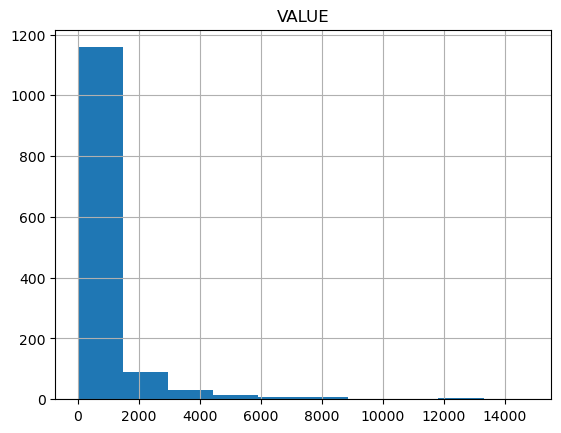

In [17]:
ds2.hist(column='VALUE')

array([[<Axes: title={'center': 'VALUE'}>]], dtype=object)

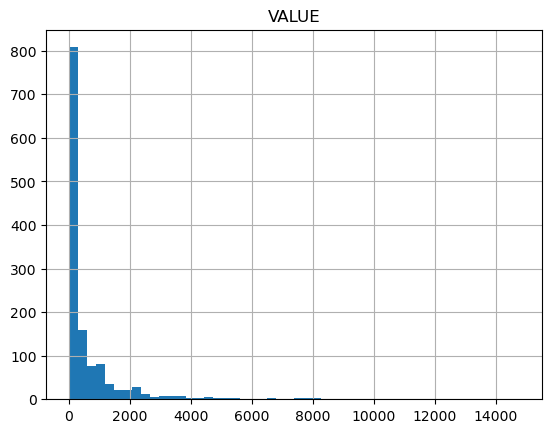

In [18]:
ds2.hist(column='VALUE', bins=50)

In [19]:
skim(ds2)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 4140   │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA     ┃ NA %    ┃ mean    ┃ sd    ┃ p0     ┃ p25    ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ TLIST(Q1)      │      0 │       0 │   20000 │    17 │  20000 │  20000 │  20000 │  20000 │  20000 │ ▇▇▇▇▇▆  │  │
│ │ VALUE          │   2823 │   68.19 │     670 │  1500 │    1.1 │    2.9 │    130 │    670 │  15000 │    ▇    │  │
│ └────────────────┴────────┴─────────┴─────────┴───────┴────────┴────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                        ┃ NA     ┃ NA %      ┃ words per row             ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ STATISTIC                          │      0 │         0 │                         1 │                 4140 │  │
│ │ Statistic Label                    │      0 │         0 │                       6.3 │                26220 │  │
│ │ Quarter                            │      0 │         0 │                         1 │                 4140 │  │
│ │ C02599V03153                       │      0 │         0 │                         1 │                 4140 │  │
│ │ Reason for Journey                 │      0 │         0 │                         2 │                 8280 │  │
│ │ C02196V04140                       │      0 │         0 │                         1 │                 4140 │  │
│ │ Region Visited                     │      0 │         0 │                       1.3 │                 5520 │  │
│ │ UNIT                               │      0 │         0 │                       1.7 │                 6900 │  │
│ └────────────────────────────────────┴────────┴───────────┴───────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [20]:
summary = dfSummary(ds2)
summary

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,STATISTIC[object],1. HTQ17C012. HTQ17C023. HTQ17C03,"1,380 (33.3%)1,380 (33.3%)1,380 (33.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABZUlEQVR4nO3bQWrCYBSF0ZcSSp0kBMHFuIgutovIbkT8B23pJB10aGeV+4s9ZwVP+FAiucO2bQUJT70P4P8YqmpXVc+9D7mhr23bPnofwbVxv9+/TtO09D7kVlpr52EY3gR3f8Zpmpbj8fgxz/Nn72P+6nK5vKzrupxOp+eqEtudGauq5nn+PBwO772PuZFd7wP4nQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVT/vgfU+5BYe5XM8qrG1dl7XdakHeQ+stXauqq/ed3DNBoGYwZSPFN9sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRYwHBGL8jBJjykeMKR8xpnzEeEAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowpHzGmfMTYIBBjykfMN77xo0reSBZ8AAAAAElFTkSuQmCC"">",0(0.0%)
2,Statistic Label[object],1. Number of Trips by Irish Resid2. Number of Nights by Irish Resi3. Average Length of Stay by Iris,"1,380 (33.3%)1,380 (33.3%)1,380 (33.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABZUlEQVR4nO3bQWrCYBSF0ZcSSp0kBMHFuIgutovIbkT8B23pJB10aGeV+4s9ZwVP+FAiucO2bQUJT70P4P8YqmpXVc+9D7mhr23bPnofwbVxv9+/TtO09D7kVlpr52EY3gR3f8Zpmpbj8fgxz/Nn72P+6nK5vKzrupxOp+eqEtudGauq5nn+PBwO772PuZFd7wP4nQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVT/vgfU+5BYe5XM8qrG1dl7XdakHeQ+stXauqq/ed3DNBoGYwZSPFN9sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRYwHBGL8jBJjykeMKR8xpnzEeEAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowpHzGmfMTYIBBjykfMN77xo0reSBZ8AAAAAElFTkSuQmCC"">",0(0.0%)
3,TLIST(Q1)[int64],Mean (sd) : 20206.3 (16.5)min < med < max:20181.0 < 20204.0 < 20233.0IQR (CV) : 30.0 (1221.0),23 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAACaElEQVR4nO3av8raUBjH8efoq8Q/RESqm0vHQoeMXkQvtpfQwStw6NLJTRCJmL7BGNOtS+HVk2Oa/OD7mX3OkfBFCTyuqioDuq7X9hcAnvH26APOuZGZDWuef62q6r3mLPDXh6E650aLxeJbHMfzOoefz+eTc+47sSLUo1/UYRzH881m8z6bzXKfg9M0jbbb7fx4PA7NjFAR5OFfv5nZbDbLl8vl7xrnj2rMAP/gZQoSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSCBUSntqeakubS9ssjPtr8pl1NtQ2l7ZZGPfX9DPrbKjW7tI2C+P+Gn1mXQ7VzNpd2mZh3F9Tz4yXKUggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEggVEjo/PaUorIsB2YWO+fqjPfM7B5wfch8yGx8v98HNWcfItQXy7JsUBTF1/V63e/3+157mWVZDrIs+zydTn/1er3C9+6Q+dC7i6KIyrL8kuf5DzOrs+b3IUJ9sev1+hZF0ThJkny1Wp18Zvf7/Xy3231KkuSn72zo/IvuHt9ut77v7DMItSGTycR7gfh0Oo3qzobOv+rupvAyBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmNLqUE7mUG7Te2eTder7FQQ/YyzcL2G9u8G81oLNSQvUyzsP3GNu9GMxrfR21zv7Gru5Xwx8sUJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJBAqJDy1PZWmaeR78OVyiczMsiyLDofD+H/Oq96t+r1D55/p6w8JHo3RrfmAswAAAABJRU5ErkJggg=="">",0(0.0%)
4,Quarter[object],1. 2018Q12. 2021Q13. 2023Q24. 2023Q15. 2022Q46. 2022Q37. 2022Q28. 2022Q19. 2021Q410. 2021Q311. other,"180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)180 (4.3%)2,340 (56.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADh0lEQVR4nO3cQWoaYQCG4d8iodkoIniYHKKH7SG8jYizaEI2dtFAmqDJYtq3YJ9n2dkM4WVkhv/r4nw+Dyh8+dc3wP9DbGTERkZsZMRGRmxkxEZGbGTERmYxxrgfY9xduf58Pp8fw/vhhi232+231Wq1uXRxmqbjYrH4Ljj+hOVqtdo8PDw8rtfrp98vnE6nr/v9fnM4HO7GGGJjtuUYY6zX66fdbvfjwvX7+H64YV4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMX2fX3l+49G8wx3KapuN+v9+MC2fXpmk6jjGe+9viFtkgkFn4L7OoeLKRsa4iY11FxrqKjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxlPNjIGL2QMXsgYvJDxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh4wWBjJ9RMtZVZKyryFhXkfGCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnHwslYV5HxZCNj8ELG4IWM

In [21]:
# Read csv from url
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HTQ21/CSV/1.0/en"


In [22]:
df = pd.read_csv(url)

In [23]:
df.head()

,STATISTIC,Statistic Label,TLIST(Q1),Quarter,C02276V02746,Destination,UNIT,VALUE
0,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q1,2018Q1,1,Domestic,Thousand,2688.0
1,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q1,2018Q1,2,Outbound,Thousand,218.0
2,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q2,2018Q2,1,Domestic,Thousand,3068.0
3,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q2,2018Q2,2,Outbound,Thousand,145.0
4,HTQ21C01,Number of Same Day Trips by Irish Residents,2018Q3,2018Q3,1,Domestic,Thousand,3472.0


In [24]:
df.shape

(92, 8)

In [25]:
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,STATISTIC[object],1. HTQ21C012. HTQ21C02,46 (50.0%)46 (50.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBNxD9wROi96zgYy6GBL/QWjNAIZjZ3cxuow+Z0Ku19hh9xEziuq5fKaVl9CGzqbWeIYRvgntfTCkt+74/cs7P0cfM4rquz1LKchzHzcyI7U3RzCzn/Ny27Wf0MZO5jz5gNh+jD8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sYcPQhM+F5+cRa61lKWYyPAbvUWk8ze42+YyYMXvwYvHQKTPmgwpvNjzdbJ6Z8Tkz5+jHlc2DK58OUz49f7534UxcyxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yDDlc+B5+TDlc2LK14/Bix+Dl06/fpBq344fqoAAAAAASUVORK5CYII="">",0(0.0%)
2,Statistic Label[object],1. Number of Same Day Trips by Ir2. Estimated Expenditure by Irish,46 (50.0%)46 (50.0%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAAuCAYAAAA/ZmtKAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABN0lEQVR4nO3bQWrDMBRF0a8iQjORMAYvxovoYrsI7cYYa9CETNRBNxD9wROi96zgYy6GBL/QWjNAIZjZ3cxuow+Z0Ku19hh9xEziuq5fKaVl9CGzqbWeIYRvgntfTCkt+74/cs7P0cfM4rquz1LKchzHzcyI7U3RzCzn/Ny27Wf0MZO5jz5gNh+jD8D/QWyQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhlig0w0+/sYcPQhM+F5+cRa61lKWYyPAbvUWk8ze42+YyYMXvwYvHQKTPmgwpvNjzdbJ6Z8Tkz5+jHlc2DK58OUz49f7534UxcyxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yDDlc+B5+TDlc2LK14/Bix+Dl06/fpBq344fqoAAAAAASUVORK5CYII="">",0(0.0%)
3,TLIST(Q1)[object],1. 2018Q12. 2021Q13. 2023Q24. 2023Q15. 2022Q46. 2022Q37. 2022Q28. 2022Q19. 2021Q410. 2021Q311. other,4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)52 (56.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADh0lEQVR4nO3cQWoaYQCG4d8iodkoIniYHKKH7SG8jYizaEI2dtFAmqDJYtq3YJ9n2dkM4WVkhv/r4nw+Dyh8+dc3wP9DbGTERkZsZMRGRmxkxEZGbGTERmYxxrgfY9xduf58Pp8fw/vhhi232+231Wq1uXRxmqbjYrH4Ljj+hOVqtdo8PDw8rtfrp98vnE6nr/v9fnM4HO7GGGJjtuUYY6zX66fdbvfjwvX7+H64YV4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMX2fX3l+49G8wx3KapuN+v9+MC2fXpmk6jjGe+9viFtkgkFn4L7OoeLKRsa4iY11FxrqKjI+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZAxeyBi8kHEsnIzBCxlPNjIGL2QMXsgYvJDxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh4wWBjJ9RMtZVZKyryFhXkfGCQEZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRnHwslYV5HxZCNj8ELG4IWMwQsZH3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIGLyQMXgh41g4GYMXMp5sZAxeyBi8kDF4IeOjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkbGuImNdRcYGgYx1FRlPNjLWVWSsq8hYV5HxUZeM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MwQsZgxcyjoWTMXgh48lGxuCFjMELGYMXMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2S8IJDxM0rGuoqMdRUZ6yoyXhDIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIWFeRsa4i41g4GesqMp5sZAxeyBi8kDF4IeOjLhmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmDFzIGL2QcCydj8ELmsycb8/l1ePHh4IX5jIZeXR28MJ/R0FufDV6Yz2johY+6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZK4OXpjP3/WtDwcvzGc09Mqx8L/PsfAXBi9kvCCQERsZsZERGxmxkREbGbGRERsZsZH5CQ2vTuJulXvoAAAAAElFTkSuQmCC"">",0(0.0%)
4,Quarter[object],1. 2018Q12. 2021Q13. 2023Q24. 2023Q15. 2022Q46. 2022Q37. 2022Q28. 2022Q19. 2021Q410. 2021Q311. other,4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)4 (4.3%)52 (56.5%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAADh0lEQVR4nO3cQWoaYQCG4d8iodkoIniYHKKH7SG8jYizaEI2dtFAmqDJYtq3YJ9n2dkM4WVkhv/r4nw+Dyh8+dc3wP9DbGTERkZsZMRGRmxkxEZGbGTERmYxxrgfY9xduf58Pp8fw/vhhi232+231Wq1uXRxmqbjYrH4Ljj+hOVqtdo8PDw8rtfrp98vnE6nr/v9fnM4HO7GGGJjtuUYY6zX66fdbvfjwvX7+H64YV4QyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzHKMX2fX3l+49G8wx3KapuN+v9+MC2fXpmk6jjGe+9viFtkgkFn4L7OoeLKRsa4iY11FxrqKjI+6ZMR

In [26]:
# TMA10 - Estimated Expenditure by Overseas Travellers to Ireland

In [27]:
tma10_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TMA10/CSV/1.0/en")

In [28]:
tma10_df.head()

,STATISTIC,Statistic Label,C02149V02592,Type of Expenditure,TLIST(A1),Year,UNIT,VALUE
0,TMA10,Estimated Expenditure by Overseas Travellers t...,8,Expenditure by overseas travellers in Ireland ...,2009,2009,Euro Million,3410
1,TMA10,Estimated Expenditure by Overseas Travellers t...,8,Expenditure by overseas travellers in Ireland ...,2010,2010,Euro Million,2976
2,TMA10,Estimated Expenditure by Overseas Travellers t...,8,Expenditure by overseas travellers in Ireland ...,2011,2011,Euro Million,2899
3,TMA10,Estimated Expenditure by Overseas Travellers t...,8,Expenditure by overseas travellers in Ireland ...,2012,2012,Euro Million,2916
4,TMA10,Estimated Expenditure by Overseas Travellers t...,8,Expenditure by overseas travellers in Ireland ...,2013,2013,Euro Million,3262


In [29]:
tma10_df.shape

(33, 8)

In [30]:
dfSummary(tma10_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,STATISTIC[object],1. TMA10,33 (100.0%),,0(0.0%)
2,Statistic Label[object],1. Estimated Expenditure by Overs,33 (100.0%),,0(0.0%)
3,C02149V02592[int64],1. 82. 93. 10,11 (33.3%)11 (33.3%)11 (33.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABZUlEQVR4nO3bQWrCYBSF0ZcSSp0kBMHFuIgutovIbkT8B23pJB10aGeV+4s9ZwVP+FAiucO2bQUJT70P4P8YqmpXVc+9D7mhr23bPnofwbVxv9+/TtO09D7kVlpr52EY3gR3f8Zpmpbj8fgxz/Nn72P+6nK5vKzrupxOp+eqEtudGauq5nn+PBwO772PuZFd7wP4nQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVT/vgfU+5BYe5XM8qrG1dl7XdakHeQ+stXauqq/ed3DNBoGYwZSPFN9sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRYwHBGL8jBJjykeMKR8xpnzEeEAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowpHzGmfMTYIBBjykfMN77xo0reSBZ8AAAAAElFTkSuQmCC"">",0(0.0%)
4,Type of Expenditure[object],1. Expenditure by overseas travel2. Fare receipts of Irish carrier3. Overseas tourism and travel ea,11 (33.3%)11 (33.3%)11 (33.3%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAABZUlEQVR4nO3bQWrCYBSF0ZcSSp0kBMHFuIgutovIbkT8B23pJB10aGeV+4s9ZwVP+FAiucO2bQUJT70P4P8YqmpXVc+9D7mhr23bPnofwbVxv9+/TtO09D7kVlpr52EY3gR3f8Zpmpbj8fgxz/Nn72P+6nK5vKzrupxOp+eqEtudGauq5nn+PBwO772PuZFd7wP4nQcEYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSMVT/vgfU+5BYe5XM8qrG1dl7XdakHeQ+stXauqq/ed3DNBoGYwZSPFN9sxFhXEWNdRYx1FTH+1CVGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjHUVMdZVxNggEGNdRYwHBGL8jBJjykeMKR8xpnzEeEAgRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERowpHzGmfMTYIBBjykfMN77xo0reSBZ8AAAAAElFTkSuQmCC"">",0(0.0%)
5,TLIST(A1)[int64],Mean (sd) : 2014.0 (3.2)min < med < max:2009.0 < 2014.0 < 2019.0IQR (CV) : 6.0 (627.2),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB/ElEQVR4nO3cMW7CQBBG4VknIBuQLYQCB0iZjpJD5LA5QgpOQJEmFR0SsoxwsALGaWkAswaSP3pfi4ad4gmJZlxVVQb8dcFvLwDU8fjbC+D/cM5FZtb2HP+uqmpz7ENCxVU456LBYPAax3HfZ361WqXOubdjsRIqrqUdx3F/MplskiQpLhnMsiycTqf95XLZNjNCxe0lSVIMh8Mvj9Ho1If8mYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEs2cnG14RDsxs7znbdF71bdW94/1+3/KcPetkqE2uCJdl2crz/LnX630GQbC957zq26p7m5ltt9uwLMuXoijezcznPupJ535Rva8Iz+fz/mw2exqPxx+j0Si9dLEm86pvq+59MN/Z7XYPl87WUevitM8V4TRNIzOzbrfrdYG4ybzq26p7H87fCn+mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaHWNb8sy8JLv3i9XodmZnmeh4vFonPPedW3VfduOl+nrx9bL0L3hE0NkwAAAABJRU5ErkJggg=="">",0(0.0%)
6,Year[int64],Mean (sd) : 2014.0 (3.2)min < med < max:2009.0 < 2014.0 < 2019.0IQR (CV) : 6.0 (627.2),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB/ElEQVR4nO3cMW7CQBBG4VknIBuQLYQCB0iZjpJD5LA5QgpOQJEmFR0SsoxwsALGaWkAswaSP3pfi4ad4gmJZlxVVQb8dcFvLwDU8fjbC+D/cM5FZtb2HP+uqmpz7ENCxVU456LBYPAax3HfZ361WqXOubdjsRIqrqUdx3F/MplskiQpLhnMsiycTqf95XLZNjNCxe0lSVIMh8Mvj9Ho1If8mYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEs2cnG14RDsxs7znbdF71bdW94/1+3/KcPetkqE2uCJdl2crz/LnX630GQbC957zq26p7m5ltt9uwLMuXoijezcznPupJ535Rva8Iz+fz/mw2exqPxx+j0Si9dLEm86pvq+59MN/Z7XYPl87WUevitM8V4TRNIzOzbrfrdYG4ybzq26p7H87fCn+mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaHWNb8sy8JLv3i9XodmZnmeh4vFonPPedW3VfduOl+nrx9bL0L3hE0NkwAAAABJRU5ErkJggg=="">",0(0.0%)
7,UNIT[object],1. Euro Million,33 (100

In [31]:
# TMA09 - Overseas Trips (incl. Expenditure) to Ireland

In [32]:
tma09_df = pd.read_csv("https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/TMA09/CSV/1.0/en")

In [33]:
tma09_df.head(33)

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All Countries,2009,2009,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6907.0
1,-,All Countries,2009,2009,TMA09C2,Average Length of Stay by Overseas Travellers ...,Nights,7.6
2,-,All Countries,2009,2009,TMA09C3,Expenditure by Overseas Travellers in Ireland ...,Euro Million,3410.0
3,-,All Countries,2010,2010,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6139.0
4,-,All Countries,2010,2010,TMA09C2,Average Length of Stay by Overseas Travellers ...,Nights,7.8
5,-,All Countries,2010,2010,TMA09C3,Expenditure by Overseas Travellers in Ireland ...,Euro Million,2976.0
6,-,All Countries,2011,2011,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6505.0
7,-,All Countries,2011,2011,TMA09C2,Average Length of Stay by Overseas Travellers ...,Nights,7.7
8,-,All Countries,2011,2011,TMA09C3,Expenditure by Overseas Travellers in Ireland ...,Euro Million,2899.0
9,-,All Countries,2012,2012,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6517.0


In [34]:
tma09_df.shape

(297, 8)

In [35]:
tma09_df.describe(include="all")

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
count,297,297,297.000000,297.000000,297,297,297,273.000000
unique,9,9,NaN,NaN,3,3,3,NaN
top,-,All Countries,NaN,NaN,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,NaN
freq,33,33,NaN,NaN,99,99,99,NaN
mean,NaN,NaN,2014.000000,2014.000000,NaN,NaN,NaN,978.545788
std,NaN,NaN,3.167615,3.167615,NaN,NaN,NaN,1835.365064
min,NaN,NaN,2009.000000,2009.000000,NaN,NaN,NaN,4.100000
25%,NaN,NaN,2011.000000,2011.000000,NaN,NaN,NaN,10.000000
50%,NaN,NaN,2014.000000,2014.000000,NaN,NaN,NaN,268.000000
75%,NaN,NaN,2017.000000,2017.000000,NaN,NaN,NaN,935.000000


In [36]:
dfSummary(tma09_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,C02173V02619[object],1. -2. DE3. FR4. IT5. USCA6. XB7. ZZAC28. ZZEURQ069. ZZWORX18,33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC4klEQVR4nO3cMWrbYACG4V/FhGaxMAYfxofoYXsI3cYYa2hCFnXo3A6xeQvO8+wWGl4UJP4v07ZtAwrf/vcN8HWIjYzYyIiNjNjIiI2M2MhMY4zXMcbLndf52Lbt7QH3wxPbHY/HH/v9/nDPRdZ1vU7T9FNw/Mtuv98fzufz2zzP75+5wO12+74sy+FyubyMMcTGX+3GGGOe5/fT6fTrjuu8Puh+eGJeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MjsxvhzTOizF7jnt3wtu3Vdr8uyHMYdx4TWdb2OMT4ed1s8I8fCyUz+1wcVTzYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMo6FkzF4IeMFgYw/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyjoWTsa4i48lGxuCFjMELGYMXMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q82cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGuoqMDQIZ6yoynmxkrKvIWFeRsa4i46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZBwLJ2PwQsaTjYzBCxmDFzIGL2R81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8jYIJCxriLjyUbGuoqMdRUZ6yoyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZDzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iowNAhnrKjJeEMiIjYzYyIiNjNjIiI3Mb/3f4/Pfa45sAAAAAElFTkSuQmCC"">",0(0.0%)
2,Area of Residence[object],1. All Countries2. Germany3. France4. Italy5. United States and Canada6. Great Britain (includes Englan7. Australia and New Zealand8. Other Europe (14)9. Other countries (18),33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%)33 (11.1%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAADPCAYAAADifqNtAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC4klEQVR4nO3cMWrbYACG4V/FhGaxMAYfxofoYXsI3cYYa2hCFnXo3A6xeQvO8+wWGl4UJP4v07ZtAwrf/vcN8HWIjYzYyIiNjNjIiI2M2MhMY4zXMcbLndf52Lbt7QH3wxPbHY/HH/v9/nDPRdZ1vU7T9FNw/Mtuv98fzufz2zzP75+5wO12+74sy+FyubyMMcTGX+3GGGOe5/fT6fTrjuu8Puh+eGJeEMiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MjsxvhzTOizF7jnt3wtu3Vdr8uyHMYdx4TWdb2OMT4ed1s8I8fCyUz+1wcVTzYyBi9kDF7IGLyQ8VGXjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGYMXMo6FkzF4IeMFgYw/o2Ssq8hYV5GxriLjBYGM2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2MdRUZ6yoyjoWTsa4i48lGxuCFjMELGYMXMj7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkTF4IWPwQsaxcDIGL2Q82cgYvJAxeCFj8ELGR10yYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiNjXUXGuoqMDQIZ6yoynmxkrKvIWFeRsa4i46MuGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGYMXMgYvZBwLJ2PwQsaTjYzBCxmDFzIGL2R81CUjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjLWVWSsq8jYIJCxriLjyUbGuoqMdRUZ6yoyPuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZDzZyBi8kDF4IWPwQsZHXTJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6iowNAhnrKjJeEMiIjYzYyIiNjNjIiI3Mb/3f4/Pfa45sAAAAAElFTkSuQmCC"">",0(0.0%)
3,TLIST(A1)[int64],Mean (sd) : 2014.0 (3.2)min < med < max:2009.0 < 2014.0 < 2019.0IQR (CV) : 6.0 (635.8),11 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB/ElEQVR4nO3cMW7CQBBG4VknIBuQLYQCB0iZjpJD5LA5QgpOQJEmFR0SsoxwsALGaWkAswaSP3pfi4ad4gmJZlxVVQb8dcFvLwDU8fjbC+D/cM5FZtb2HP+uqmpz7ENCxVU456LBYPAax3HfZ361WqXOubdjsRIqrqUdx3F/MplskiQpLhnMsiycTqf95XLZNjNCxe0lSVIMh8Mvj9Ho1If8mYIEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoUEQoWEs2cnG14RDsxs7znbdF71bdW94/1+3/KcPetkqE2uCJdl2crz/LnX630GQbC957zq26p7m5ltt9uwLMuXoijezcznPupJ535Rva8Iz+fz/mw2exqPxx+j0Si9dLEm86pvq+59MN/Z7XYPl87WUevitM8V4TRNIzOzbrfrdYG4ybzq26p7H87fCn+mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIaHWNb8sy8JLv3i9XodmZnmeh4vFonPPedW3VfduOl+nrx

In [37]:
tma09_df["C02173V02619"].value_counts()

C02173V02619
-           33
DE          33
FR          33
IT          33
USCA        33
XB          33
ZZAC2       33
ZZEURQ06    33
ZZWORX18    33
Name: count, dtype: int64

In [38]:
tma09_df_C1 = tma09_df[tma09_df["STATISTIC"]=="TMA09C1"]

In [39]:
tma09_df_C1.head(10)

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All Countries,2009,2009,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6907.0
3,-,All Countries,2010,2010,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6139.0
6,-,All Countries,2011,2011,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6505.0
9,-,All Countries,2012,2012,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6517.0
12,-,All Countries,2013,2013,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6986.0
15,-,All Countries,2014,2014,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,7604.0
18,-,All Countries,2015,2015,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,8643.0
21,-,All Countries,2016,2016,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,9584.0
24,-,All Countries,2017,2017,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,9932.0
27,-,All Countries,2018,2018,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,10616.0


In [40]:
# Number of Overseas Trips trend

<Axes: xlabel='Year', ylabel='VALUE'>

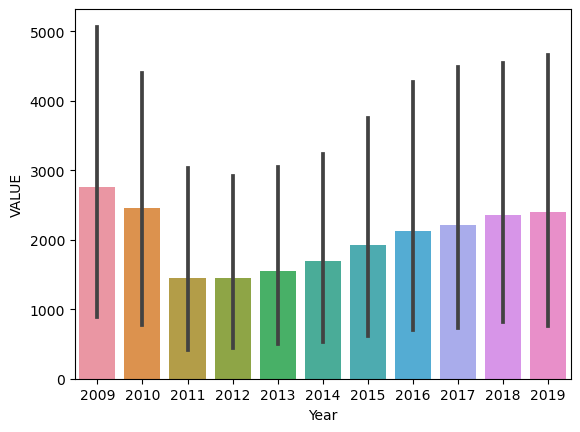

In [41]:
sns.barplot(x=tma09_df_C1["Year"], y=tma09_df_C1["VALUE"])

In [42]:
# matplotlib 
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
x = 0.5 + np.arange(8)
y = [4.8, 5.5, 3.5, 4.6, 6.5, 6.6, 2.6, 3.0]


type(y)


list

In [43]:
x = tma09_df_C1["Year"].values
y = tma09_df_C1["VALUE"].values



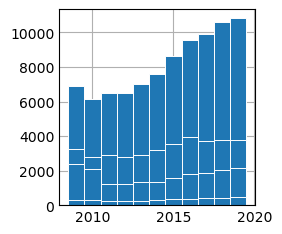

In [44]:
# plot
fig, ax = plt.subplots()

ax.bar(x, y, width=1, edgecolor="white", linewidth=0.7)

#ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [45]:
#seaboarn
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# PANDAS ORDER BY
tma09_df_C1.sort_values("VALUE").sort_values("Area of Residence").sort_values("Year")

In [127]:
# PANDAS SELECT ROWS
tma09_df_C1_2019 = tma09_df_C1[tma09_df_C1["Year"]==2019]
tma09_df_C1_2019.head(100)


# PANDAS RENAME COLUMN
tma09_df_C1_2019 = tma09_df_C1_2019.rename(columns={"C02173V02619":"Country Code"})

#tma09_df_C1_2020.to_excel("tabella.xlsx")

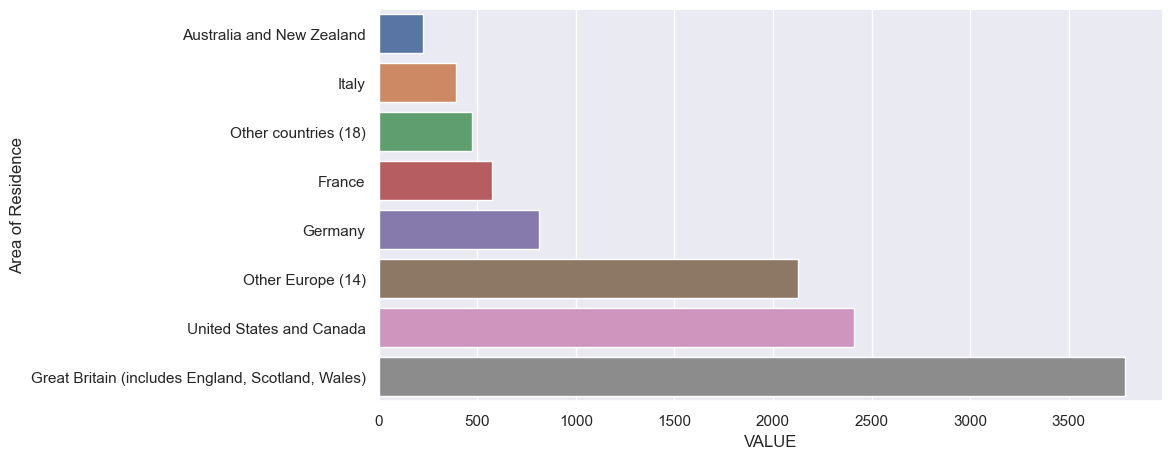

In [140]:
# Visualization: seaborn distplot
sns.set_theme(style="darkgrid")

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(8, 4))
 
# drawing the plot
sns.barplot(data=tma09_df_C1_2019.sort_values("VALUE")[tma09_df_C1_2019["Area of Residence"]!="All Countries"], y="Area of Residence", x="VALUE",  ax=ax)
plt.show()

#sns.lineplot(
#    tma09_df_C1_2020, x="C02173V02619", y="VALUE"
#)



In [48]:
tma09_df_C1["Statistic Label"].unique()

array(['Overseas Trips to Ireland by Non-Residents'], dtype=object)

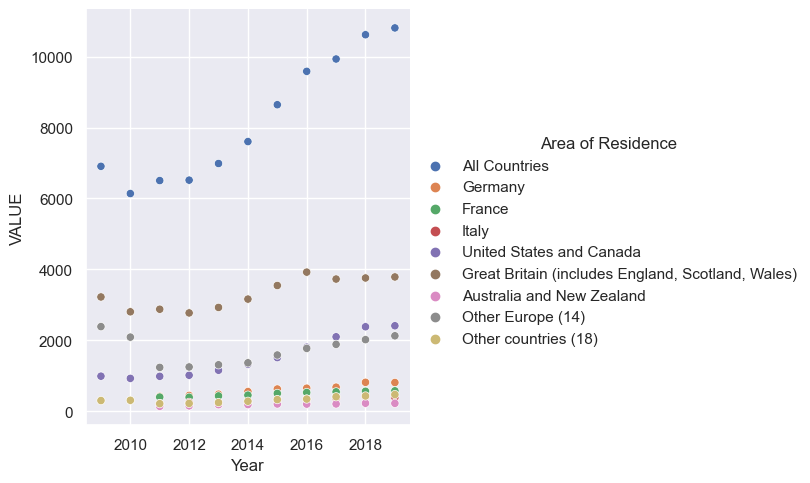

In [49]:

# Year and VALUE

sns.relplot(
    data=tma09_df_C1,
    x="Year", y="VALUE", hue="Area of Residence",
)

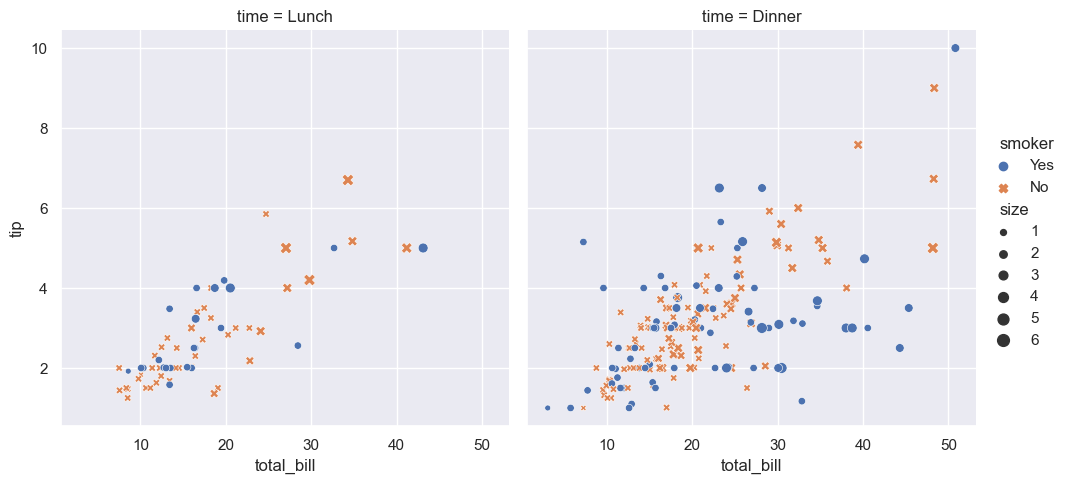

In [50]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

In [51]:
tma09_df_C1.head(20)

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All Countries,2009,2009,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6907.0
3,-,All Countries,2010,2010,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6139.0
6,-,All Countries,2011,2011,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6505.0
9,-,All Countries,2012,2012,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6517.0
12,-,All Countries,2013,2013,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6986.0
15,-,All Countries,2014,2014,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,7604.0
18,-,All Countries,2015,2015,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,8643.0
21,-,All Countries,2016,2016,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,9584.0
24,-,All Countries,2017,2017,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,9932.0
27,-,All Countries,2018,2018,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,10616.0


In [52]:
tma09_df_C1_ds = tma09_df_C1.dropna(axis=0)
tma09_df_C1_ds.head(20)

,C02173V02619,Area of Residence,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,-,All Countries,2009,2009,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6907.0
3,-,All Countries,2010,2010,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6139.0
6,-,All Countries,2011,2011,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6505.0
9,-,All Countries,2012,2012,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6517.0
12,-,All Countries,2013,2013,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,6986.0
15,-,All Countries,2014,2014,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,7604.0
18,-,All Countries,2015,2015,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,8643.0
21,-,All Countries,2016,2016,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,9584.0
24,-,All Countries,2017,2017,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,9932.0
27,-,All Countries,2018,2018,TMA09C1,Overseas Trips to Ireland by Non-Residents,Thousand,10616.0


In [53]:
tma09_df_C1_ds.isnull().values.any()

False

In [54]:
tma09_df_C1_ds = tma09_df_C1_ds[tma09_df_C1_ds["Area of Residence"]!="All Countries"]

In [55]:
# Removing columns
tma09_df_C1_ds_clean = tma09_df_C1_ds.drop(['C02173V02619', 'TLIST(A1)', 'STATISTIC', 'Statistic Label', 'UNIT'],axis=1)
# Separating dataset from labels
#tma09_df_C1_ds = tma09_df_C1.iloc[:,:7]


#tma09_df_C1_labels = tma09_df_C1_ds.iloc[:,7]
#tma09_df_C1_ds = tma09_df_C1_ds_clean
#tma09_df_C1_labels.head()


In [56]:
tma09_df_C1_ds_clean.head()

,Area of Residence,Year,VALUE
39,Germany,2011,423.0
42,Germany,2012,448.0
45,Germany,2013,483.0
48,Germany,2014,557.0
51,Germany,2015,629.0


In [57]:
tma09_df_C1_ds_clean = tma09_df_C1_ds_clean[tma09_df_C1_ds_clean["Area of Residence"]!="All Countries"]
tma09_df_C1_ds_clean.head(100)

,Area of Residence,Year,VALUE
39,Germany,2011,423.0
42,Germany,2012,448.0
45,Germany,2013,483.0
48,Germany,2014,557.0
51,Germany,2015,629.0
...,...,...,...
282,Other countries (18),2015,331.0
285,Other countries (18),2016,346.0
288,Other countries (18),2017,411.0
291,Other countries (18),2018,433.0


In [58]:
tma09_df_C1_labels = tma09_df_C1_ds_clean.drop(["Area of Residence", "Year"], axis=1)
tma09_df_C1_labels.head()

,VALUE
39,423.0
42,448.0
45,483.0
48,557.0
51,629.0


In [59]:
tma09_df_C1_ds_clean = tma09_df_C1_ds_clean.drop(["VALUE"], axis=1)
tma09_df_C1_ds_clean.head()

,Area of Residence,Year
39,Germany,2011
42,Germany,2012
45,Germany,2013
48,Germany,2014
51,Germany,2015


In [60]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
tma09_df_C1_ds_clean["Area of Residence"] = encoder.fit_transform(tma09_df_C1_ds_clean[["Area of Residence"]])

tma09_df_C1_ds_clean.head()


,Area of Residence,Year
39,2.0,2011
42,2.0,2012
45,2.0,2013
48,2.0,2014
51,2.0,2015


In [61]:
from sklearn.model_selection import train_test_split
tma09_df_C1_train_ds,tma09_df_C1_test_ds,tma09_df_C1_train_label,tma09_df_C1_test_label = train_test_split(tma09_df_C1_ds_clean, 
                                                                tma09_df_C1_labels, test_size=0.2, random_state=42)

In [62]:
# Linear Model
from sklearn.linear_model import LinearRegression

In [63]:
lin_reg = LinearRegression()
lin_reg.fit(tma09_df_C1_train_ds, tma09_df_C1_train_label)

LinearRegression()

In [64]:
some_data = tma09_df_C1_ds_clean.loc[:100]
some_labels = tma09_df_C1_labels.loc[:100]

In [65]:
print(some_labels)

    VALUE
39  423.0
42  448.0
45  483.0
48  557.0
51  629.0
54  652.0
57  681.0
60  818.0
63  812.0
72  401.0
75  396.0
78  434.0
81  456.0
84  505.0
87  531.0
90  549.0
93  565.0
96  577.0


In [66]:
lin_reg.predict(some_data)

array([[1070.27423579],
       [1054.07797272],
       [1037.88170966],
       [1021.68544659],
       [1005.48918353],
       [ 989.29292046],
       [ 973.0966574 ],
       [ 956.90039433],
       [ 940.70413127],
       [ 990.44588677],
       [ 974.2496237 ],
       [ 958.05336064],
       [ 941.85709757],
       [ 925.66083451],
       [ 909.46457145],
       [ 893.26830838],
       [ 877.07204532],
       [ 860.87578225]])

In [67]:
print(some_labels)

    VALUE
39  423.0
42  448.0
45  483.0
48  557.0
51  629.0
54  652.0
57  681.0
60  818.0
63  812.0
72  401.0
75  396.0
78  434.0
81  456.0
84  505.0
87  531.0
90  549.0
93  565.0
96  577.0


In [68]:
# Measure mean_squared_error
from sklearn.metrics import mean_squared_error
label_predictions = lin_reg.predict(some_data)
lin_mse = mean_squared_error(some_labels, label_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

440.70675906558125

In [69]:
# The model is underfitting

In [70]:
# Decision Tree Regressor -  Better than Linear Regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(tma09_df_C1_train_ds, tma09_df_C1_train_label)
label_predictions = tree_reg.predict(some_data)

tree_mse = mean_squared_error(some_labels, label_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

38.17139708676584

In [71]:
print(some_labels)

    VALUE
39  423.0
42  448.0
45  483.0
48  557.0
51  629.0
54  652.0
57  681.0
60  818.0
63  812.0
72  401.0
75  396.0
78  434.0
81  456.0
84  505.0
87  531.0
90  549.0
93  565.0
96  577.0


In [72]:
print(label_predictions)

[448. 448. 483. 557. 505. 652. 681. 818. 812. 401. 401. 434. 557. 505.
 531. 549. 565. 577.]


In [73]:
# K-fold  cross-validation for Decision Tree Regressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, tma09_df_C1_train_ds, tma09_df_C1_train_label, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

In [74]:
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Scores:  [  -9211.85714286  -61868.           -5057.42857143  -47150.
  -20653.66666667   -2138.16666667  -10510.33333333  -55155.
   -3053.16666667 -121771.        ]
Mean:  -33656.86190476191
Std:  36406.79797779231


In [75]:
# K-fold  cross-validation for Linear Regression

scores = cross_val_score(lin_reg, tma09_df_C1_train_ds, tma09_df_C1_train_label, scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)

print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std: ", scores.std())

Scores:  [ -748356.73112409 -2183019.47414231  -572084.82548559 -1915331.78318412
  -670876.0519733  -1970284.20012582 -2363565.82958864  -703045.29090919
  -599820.64174077  -840292.63144671]
Mean:  -1256667.7459720536
Std:  707667.8315447108


In [76]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(tma09_df_C1_train_ds, tma09_df_C1_train_label)

label_predictions = lin_reg.predict(some_data)
forest_mse = mean_squared_error(some_labels, label_predictions)
forest_rmse = np.sqrt(forest_mse)
print("forest_rmse: ", forest_rmse)

scores = cross_val_score(forest_reg, tma09_df_C1_train_ds, tma09_df_C1_train_label, scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-scores)

print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std: ", scores.std())


forest_rmse:  440.70675906558125
Scores:  [  -8092.25588571  -35932.76772857  -41683.24848571  -60830.5072
 -108255.56143333  -36036.90631667  -18274.39711667 -114277.52405
  -12698.34995     -51673.26563333]
Mean:  -48775.47838
Std:  34995.17833112441
